
Space X Falcon 9 First Stage Landing Prediction




Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.



Import Libraries and Define Auxiliary Functions


In [35]:
import pandas as pd #pandas to read csv datas
import numpy as np #to use arrays and maths 
import matplotlib.pyplot as plt #use to create plots
import seaborn as sns #use to create plots
from sklearn import preprocessing #use to scale data
from sklearn.model_selection import train_test_split #use to split data into training / test sets
from sklearn.model_selection import GridSearchCV #we will use this to find the parameters with the best accuracy
from sklearn.linear_model import LogisticRegression #the model we will use LogisticRegression
from sklearn.svm import SVC #the model we will use SVC Support Vector Classification
from sklearn.tree import DecisionTreeClassifier #to build the tree
from sklearn.neighbors import KNeighborsClassifier #the model we will use KNN
import warnings
warnings.filterwarnings("ignore")

In [36]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [37]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [38]:
#X Creation
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

TASK 1 

Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y,make sure the output is a Pandas series (only one bracket df['name of column']).

In [39]:
Y = data["Class"].to_numpy() # Y = result set

TASK 2

Standardize the data in X then reassign it to the variable X using the transform provided below.

In [40]:
transform = preprocessing.StandardScaler() #Is important to use the StandardScaler to get optimal result
X = transform.fit_transform(X)


TASK 3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. </br>
The training data and test data should be assigned to the following labels.

X_train, X_test, Y_train, Y_test


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)  # Split the data

TASK 4

Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.


In [42]:
paremeters = {'C': [0.01, 0.1, 1],"penalty": ['l1', 'l2'],"solver": ["liblinear", "saga", "lbfgs"] } 
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr,paremeters,scoring='accuracy', cv = 10)
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy')


TASK 5

Calculate the accuracy on the test data using the method score:


In [43]:
methods = {'LogisticRegression':logreg_cv.best_estimator_.score(X_test,y_test)}
accuracy = (logreg_cv.best_estimator_.score(X_test,y_test))
print("Accuracy of logistic regression is", accuracy)

Accuracy of logistic regression is 0.8333333333333334


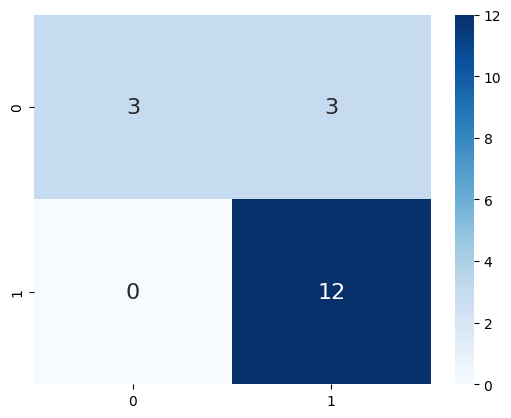

In [44]:
#confusion matrix
from sklearn import metrics
conf_matrix_t = logreg_cv.predict(X_test)
sns.heatmap(metrics.confusion_matrix(y_test, conf_matrix_t), annot=True, fmt=".0f", annot_kws={"size": 16}, cmap="Blues")
plt.show()


TASK 6

Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.


In [45]:
paremeters = {'kernel':('linear', 'rbf', 'gamma', 'poly'),'C':[0.1,1,1000], 'gamma':[1,100]}  #SVC
Svm = SVC()
svm_cv = GridSearchCV(Svm, paremeters, cv=10)
svm_cv.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 1000], 'gamma': [1, 100],
                         'kernel': ('linear', 'rbf', 'gamma', 'poly')})

In [46]:
print ("Best score: %0.3f" % svm_cv.best_score_)
print ("Best parameters set:")
best_parameters = svm_cv.best_estimator_.get_params()
for param_name in sorted(paremeters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    

Best score: 0.793
Best parameters set:
	C: 0.1
	gamma: 1
	kernel: 'linear'



TASK 7

Calculate the accuracy on the test data using the method score:


In [47]:
methods.update({'SVM' : svm_cv.best_estimator_.score(X_test,y_test)})
accuracy = (svm_cv.best_estimator_.score(X_test,y_test))
print("Accuracy of Support Vector Machine is", accuracy)

Accuracy of Support Vector Machine is 0.8333333333333334



TASK 8

Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.


In [48]:
paremeters = {'criterion':('gini', 'entropy'), 'max_features':("auto", "log2", None), 'min_samples_leaf':[1,0.06,0.08]} # Decision Tree
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, paremeters, cv=10)
tree_cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'log2', None),
                         'min_samples_leaf': [1, 0.06, 0.08]})

In [49]:
print ("Best score: %0.3f" % tree_cv.best_score_)
print ("Best parameters set:")
best_parameters = tree_cv.best_estimator_.get_params()
for param_name in sorted(paremeters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    

Best score: 0.836
Best parameters set:
	criterion: 'entropy'
	max_features: 'auto'
	min_samples_leaf: 0.08



TASK 9

Calculate the accuracy of tree_cv on the test data using the method score:


In [50]:
methods.update({'DecisionTreeClassifier' : tree_cv.best_estimator_.score(X_test,y_test)})
accuracy = (tree_cv.best_estimator_.score(X_test,y_test))
print ("Accuracy of Decision tree is ", accuracy)


Accuracy of Decision tree is  0.8888888888888888



TASK 10

Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.


In [51]:
parameters = {'n_neighbors': [1, 3, 5, 7, 9,11,13,15,17,19], 'leaf_size': [1, 3, 5, 10], 'algorithm': ['auto']} # KNN
Knn = KNeighborsClassifier()
Knn_cv = GridSearchCV(Knn, parameters, cv=10)
Knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [1, 3, 5, 10],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})

In [52]:
print ("Best score: %0.3f" % Knn_cv.best_score_)
print ("Best parameters set:")
best_parameters = Knn_cv.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    

Best score: 0.779
Best parameters set:
	algorithm: 'auto'
	leaf_size: 1
	n_neighbors: 3



TASK 11

Calculate the accuracy


In [53]:
methods.update({'KNN' : Knn_cv.best_estimator_.score(X_test,y_test)})
accuracy = (Knn_cv.best_estimator_.score(X_test,y_test))
print ("Accuracy of k Nearest Neighbor is ", accuracy)


Accuracy of k Nearest Neighbor is  0.7777777777777778



TASK 12

Find the method performs best:


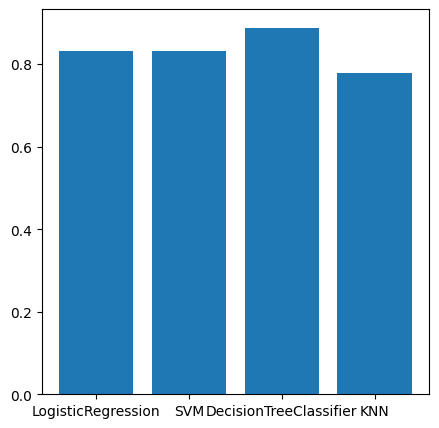

In [54]:
plt.figure(figsize = (5,5))
plt.bar(range(len(methods)), list(methods.values()), align='center')
plt.xticks(range(len(methods)), list(methods.keys()))
plt.show()
